In [1]:
from matplotlib import pyplot as plt
import platform, os, sys, pprint, h5py, emoji
from tqdm import tqdm
import numpy as np
from glob import glob
from tabulate import tabulate
from pprint import pprint
from importlib import reload
from mpl_toolkits.axes_grid.inset_locator import inset_axes

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal
from glob import glob 
from pprint import pprint
from mpltools import color

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ===================  ===================
Parameter           Value                 Std
===========  ===================  ===================
a0           -0.6309021401794597  0.02673088830220487
a1           -3.203363912660162   0.09269385125833433
===========  ===================  ===================
Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ==================  ====================
Parameter          Value                 Std
===========  ==================  ====================
a0           0.5175688061396846  0.026730888492883232
a1           1.5366972435405715  0.09269385195034023
===========  ==================  ====================


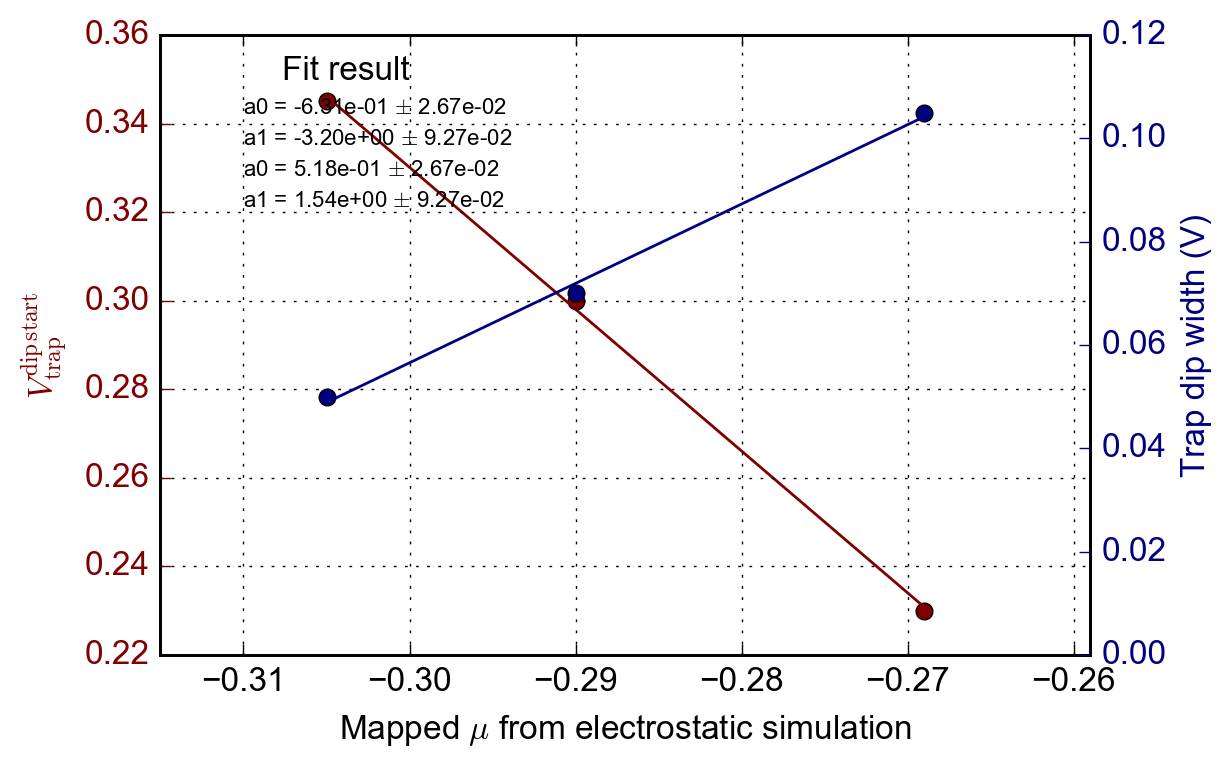

In [43]:
mus = np.array([-0.305, -0.290, -0.269])
Vtrap_avalanche = np.array([0.395, 0.370, 0.335])
width = np.array([0.050, 0.070, 0.105])
Vtrap_dip_starts = Vtrap_avalanche - width

def Vtrap_avalanche_fn(mu):
    return -0.120 - 1.69*mu

fig = plt.figure()
common.configure_axes(12)
color1, color2 = 'maroon', 'navy'
ax1, ax2 = common.setup_twinax(color1=color1, color2=color2)
ax1.plot(mus, Vtrap_dip_starts, 'o', color=color1)
fr, ferr = kfit.fit_poly(mus, Vtrap_dip_starts, fitparams=[0, 1])
ax1.plot(mus, kfit.polyfunc(mus, *fr), '-', color=color1)

def mu2Vdip(mu):
    return kfit.polyfunc(mu, *[-0.6309, -3.230336])

# ax1.plot(mus, Vtrap_avalanche, 'o', color=color1)
# ax1.plot(mus, Vtrap_avalanche_fn(mus), '-', color=color1)
# ax1.plot(mus, Vtrap_avalanche, 'o', color=color1)
ax1.set_xlabel("Mapped $\mu$ from electrostatic simulation")
ax1.set_ylabel("$V_\mathrm{trap}^\mathrm{dip\,start}$")

ax2.plot(mus, width, 'o', color=color2)
fr, ferr = kfit.fit_poly(mus, width, fitparams=[0, 1])
ax2.plot(mus, kfit.polyfunc(mus, *fr), '-', color=color2)
ax2.set_ylabel("Trap dip width (V)")
ax2.set_ylim(0.0, 0.12)
ax2.set_xlim(np.min(mus)-0.01, np.max(mus)+0.01)
ax1.grid()

# common.save_figure(fig, save_path=r"/Users/gkoolstra/Documents/Code/iPythonNotebooks/Figures")

Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ====================  ======================
Parameter           Value                   Std
===========  ====================  ======================
a0           -0.12000000000000013  4.239791056172317e-16
a1           -1.6666666666666672   1.4744111806492264e-15
===========  ====================  ======================
Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ======================  =====================
Parameter            Value                    Std
===========  ======================  =====================
a0            -0.35699999999999993    1.0469618789996e-16
a1           0.00035999999999999964  5.307881044034935e-19
===========  ======================  =====================


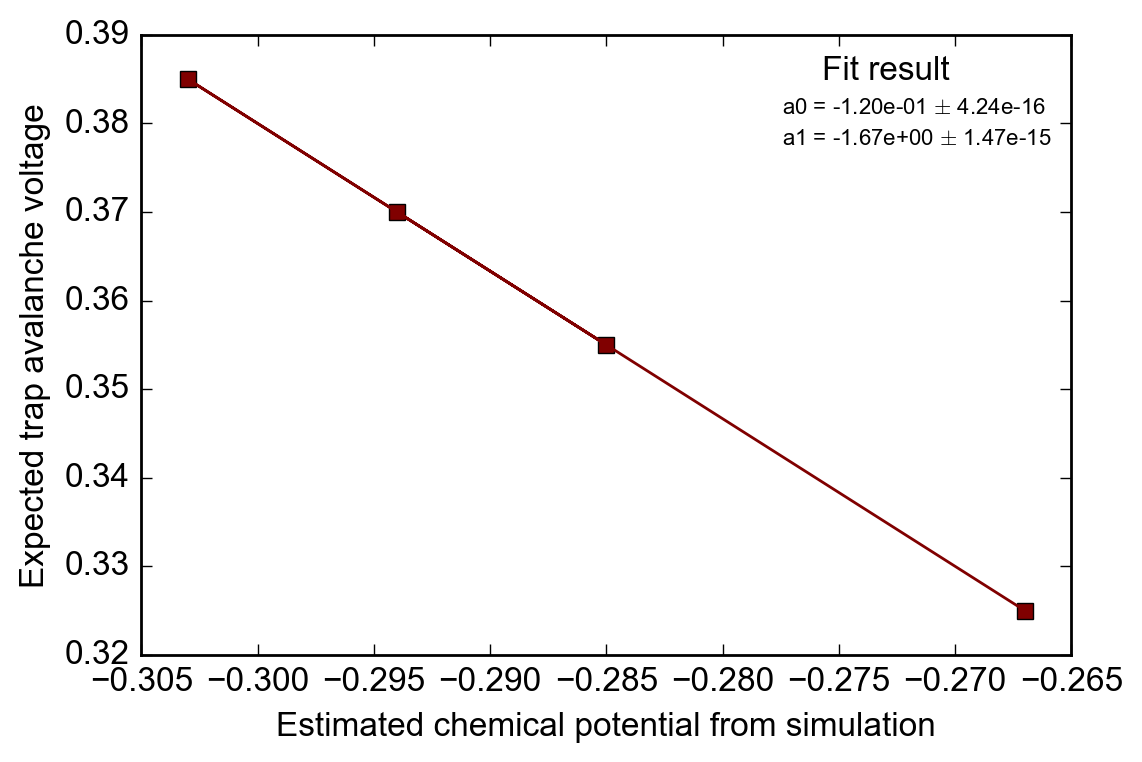

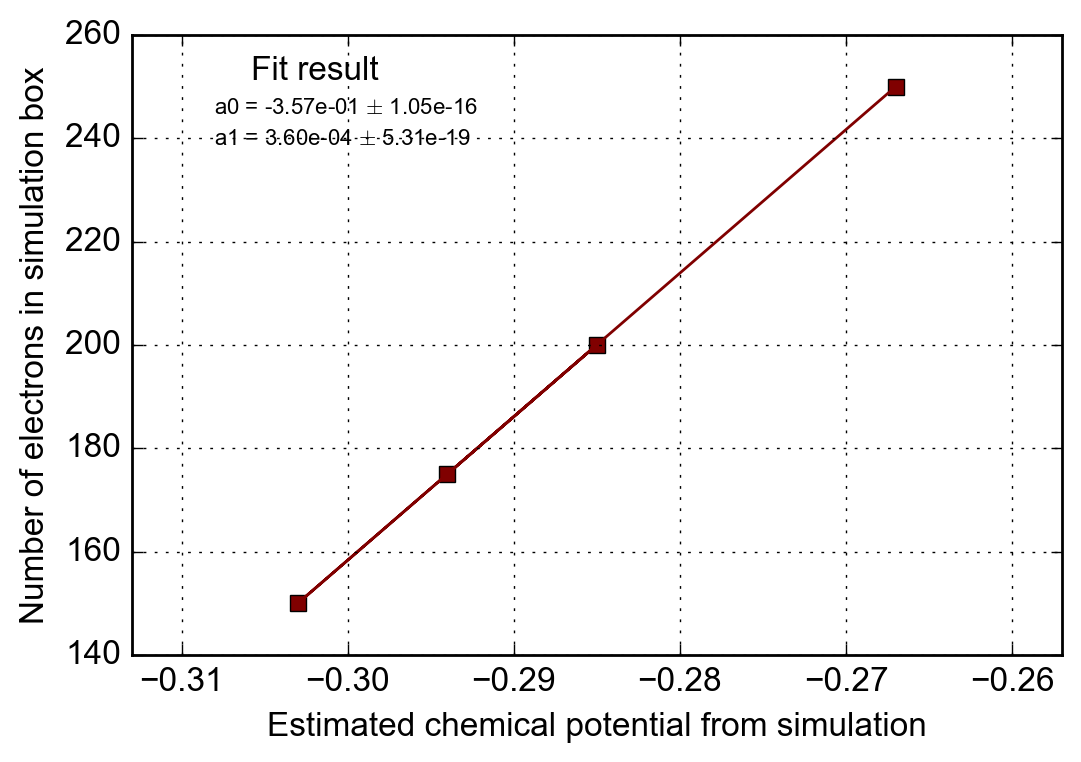

In [56]:
mus_from_simulation = np.array([-0.294, -0.285, -0.303, -0.267])
Ns = np.array([175, 200, 150, 250])
Vtrap_avalanche_expected = np.array([0.490, 0.475, 0.505, 0.445]) - 0.120

plt.figure()
common.configure_axes(12)
plt.plot(mus_from_simulation, Vtrap_avalanche_expected, 's', color=color1)
fr, ferr = kfit.fit_poly(mus_from_simulation, Vtrap_avalanche_expected, fitparams=[0, 1])
plt.plot(mus_from_simulation, kfit.polyfunc(mus_from_simulation, *fr), '-', color=color1)
plt.ylabel("Expected trap avalanche voltage")
plt.xlabel("Estimated chemical potential from simulation")

plt.figure()
common.configure_axes(12)
plt.plot(mus_from_simulation, Ns, 's', color=color1)
plt.xlim(np.min(mus_from_simulation)-0.01, np.max(mus_from_simulation)+0.01)
fr, ferr = kfit.fit_poly(Ns, mus_from_simulation, fitparams=[0, 1])
plt.plot(kfit.polyfunc(Ns, *fr), Ns , '-', color=color1)
plt.ylabel("Number of electrons in simulation box")
plt.xlabel("Estimated chemical potential from simulation")
plt.grid()

def N2mu(N):
    return kfit.polyfunc(N, *[-0.357, 3.6E-4])

def N2Vdip(N):
    return mu2Vdip(N2mu(N))

In [50]:
mu2Vdip(-0.285)

0.28974575999999985

In [51]:
N2mu(200)

-0.285

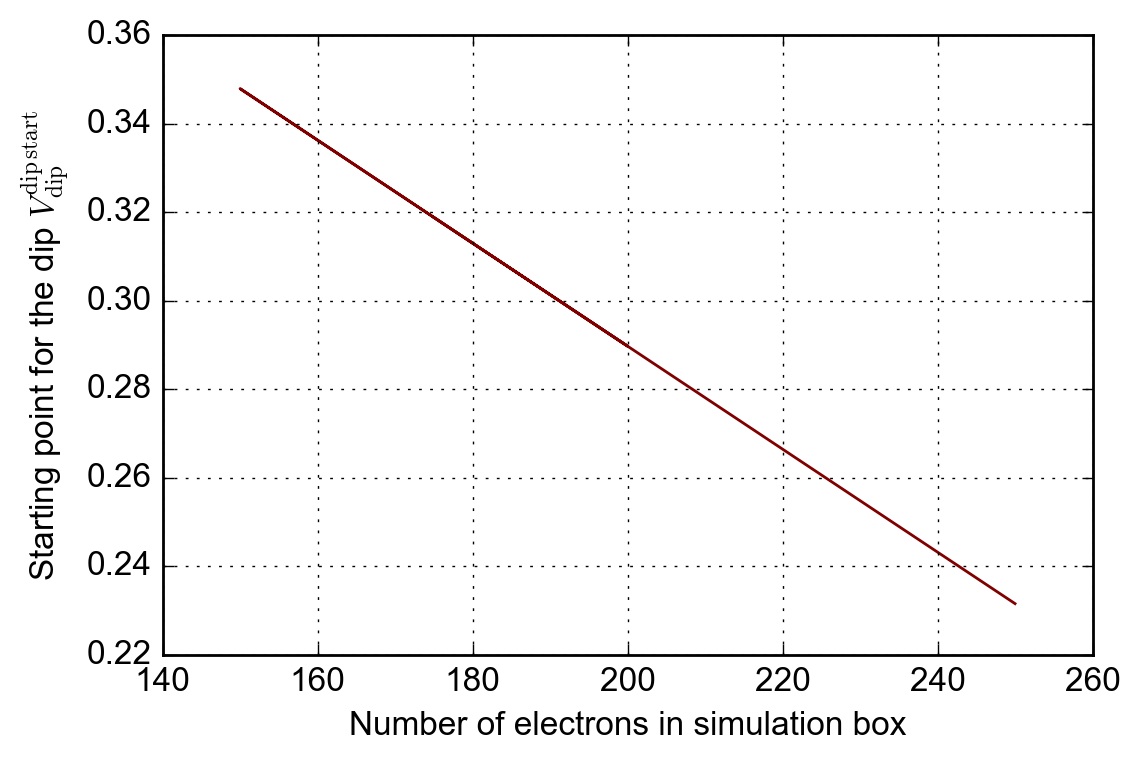

In [54]:
plt.figure()
common.configure_axes(12)
plt.plot(Ns, N2Vdip(Ns), '-', color=color1)
plt.ylabel("Starting point for the dip $V_\mathrm{dip}^\mathrm{dip\,start}$")
plt.xlabel("Number of electrons in simulation box")
plt.grid()